In [31]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Input

In [19]:
# =====================
# CONFIG
# =====================
train_dir = r"C:/Users/wahab/Downloads/Compressed/Train"  # path to your folders
img_size = 48

In [21]:
# =====================
# LOAD DATA FROM FOLDERS
# =====================
images = []
labels = []

print("Loading training images...")
for label in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, label)
    if not os.path.isdir(class_dir):
        continue
    for file in os.listdir(class_dir):
        file_path = os.path.join(class_dir, file)
        img = cv2.imread(file_path)
        if img is None:
            print(f"Warning: could not read {file_path}")
            continue
        img = cv2.resize(img, (img_size, img_size))
        images.append(img)
        labels.append(int(label))

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images.")

Loading training images...
Loaded 39209 images.


In [23]:
# =====================
# PREPROCESS
# =====================
images = images / 255.0  # Normalize
labels_cat = to_categorical(labels)  # One-hot encode

In [25]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(images, labels_cat, test_size=0.2, random_state=42)

In [37]:
# =====================
# CNN MODEL
# =====================
model = Sequential([
    Input(shape=(img_size, img_size, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels_cat.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:

# =====================
# TRAIN
# =====================
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.3393 - loss: 2.5024 - val_accuracy: 0.9086 - val_loss: 0.3957
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.8002 - loss: 0.6521 - val_accuracy: 0.9619 - val_loss: 0.1597
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8781 - loss: 0.3849 - val_accuracy: 0.9816 - val_loss: 0.0932
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9118 - loss: 0.2753 - val_accuracy: 0.9811 - val_loss: 0.0760
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9272 - loss: 0.2307 - val_accuracy: 0.9878 - val_loss: 0.0588
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9329 - loss: 0.2066 - val_accuracy: 0.9909 - val_loss: 0.0428
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9435 - loss: 0.1708 - val_accuracy: 0.9904 - val_loss: 0.0417
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9533 - loss: 0.1438 - 

In [41]:

# =====================
# EVALUATE
# =====================
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

acc = accuracy_score(y_true_classes, y_pred_classes)
print("Validation Accuracy:", acc)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Validation Accuracy: 0.9946442234123948


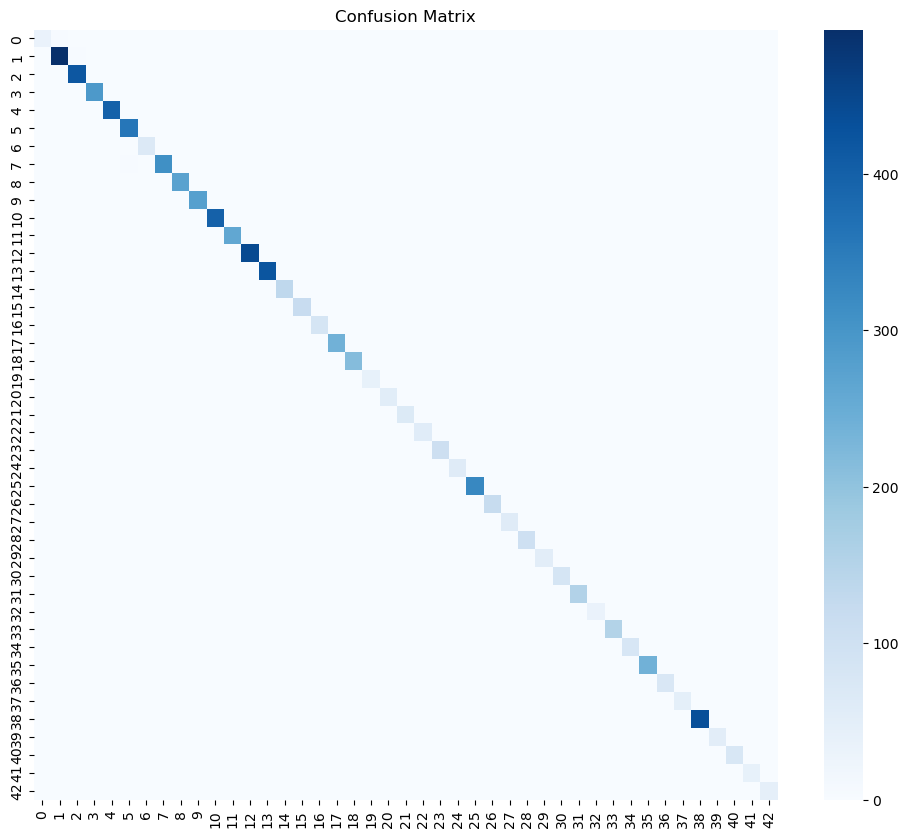

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()